# Imports

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import geopandas as gpd
from matplotlib.colors import ListedColormap
import numpy as np
from shapely.ops import unary_union
import matplotlib.patches as mpatches
from adjustText import adjust_text




In [64]:
# Estrazione nomi comuni
tammaro_titerno = "Amorosi, Campolattaro, Casalduni, Castelpagano, Castelvenere, Cerreto Sannita, Circello, Colle Sannita, Cusano Mutri, Faicchio, Fragneto l'Abate, Fragneto Monforte, Guardia Sanframondi, Morcone, Pesco Sannita, Pietraroja, Pietrelcina, Ponte, Pontelandolfo, Puglianello, Reino, San Lorenzello, San Lorenzo Maggiore, San Lupo, San Salvatore Telesino, Santa Croce del Sannio, Sassinoro, Solopaca, Telese Terme, Pago Veiano"
comuni = [comune.lstrip().rstrip() for comune in tammaro_titerno.split(",")]
print("I comuni analizzati sono:", len(comuni))


I comuni analizzati sono: 30


## Popolazione Residente


In [65]:
# Import dataset
pop_campania = pd.read_csv("./Datasets/pop_residente.csv")

In [66]:
# Check presenza comuni nel dataset
comuni_campania = list(pop_campania['Territorio'])
missing_comuni = []
for i in comuni:
    if i not in comuni_campania and i not in missing_comuni:
        missing_comuni.append(i)

if len(missing_comuni) == 0: print("Trovati tutti i comuni")
else: print("Mancano i comuni:",missing_comuni)


Trovati tutti i comuni


In [67]:
comuni_it = gpd.read_file('.\Datasets\Shapefiles\Limiti01012023\Limiti01012023\Com01012023\Com01012023_WGS84.shp')
province_it = gpd.read_file('.\Datasets\Shapefiles\Limiti01012023\Limiti01012023\ProvCM01012023\ProvCM01012023_WGS84.shp')


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\vinor\AppData\Local\Temp\ipykernel_22668\4154905172.py:1: SyntaxWarning: invalid escape sequence '\D'
  comuni_it = gpd.read_file('.\Datasets\Shapefiles\Limiti01012023\Limiti01012023\Com01012023\Com01012023_WGS84.shp')
C:\Users\vinor\AppData\Local\Temp\ipykernel_22668\4154905172.py:2: SyntaxWarning: invalid escape sequence '\D'
  province_it = gpd.read_file('.\Datasets\Shapefiles\Limiti01012023\Limiti01012023\ProvCM01012023\ProvCM01012023_WGS84.shp')


In [68]:
# Crea una serie di valori booleani per ciascuna stringa nella lista
criteria_tammaro = comuni_it['COMUNE'].isin(comuni)
comuni_shapes = comuni_it[criteria_tammaro]

# Selezioniano il criterio per i comuni campani
criteria_comuni_campania = comuni_it['COD_REG'] == 15
comuni_campania_shapes = comuni_it[criteria_comuni_campania]

# Selezioniamo il criterio per le province campane
criteria_province_campania = province_it['COD_REG'] == 15
province_campania_shapes = province_it[criteria_province_campania]


# Plot comuni
Il dataset italy vede come codice regione per la campania il 15

In [69]:
viridis = plt.cm.get_cmap('viridis')
colore1 = viridis(0.15)  # Seleziona un colore vicino all'inizio della palette
colore2 = viridis(0.85)  # Seleziona un colore vicino alla fine della palette


C:\Users\vinor\AppData\Local\Temp\ipykernel_22668\1347979578.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis')


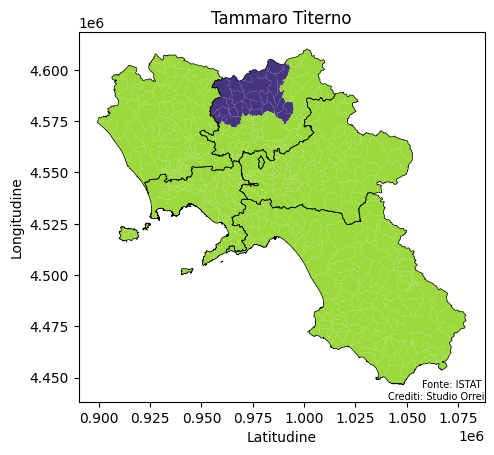

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)

comuni_campania_shapes[comuni_campania_shapes['COMUNE'].isin(comuni)].plot(ax=ax, color=colore1)
comuni_campania_shapes[~comuni_campania_shapes['COMUNE'].isin(comuni)].plot(ax=ax, color=colore2)

ax.set_title('Tammaro Titerno')
ax.set_xlabel('Latitudine')
ax.set_ylabel('Longitudine')
province_campania_shapes.boundary.plot(ax=ax, linewidth=0.5, color='black')

font_properties = {'verticalalignment': 'bottom', 'horizontalalignment': 'right', 'fontsize': 7, 'color': 'black'}
ax.text(1.0, 0.0, 'Fonte: ISTAT \nCrediti: Studio Orrei', transform=ax.transAxes, **font_properties)

plt.show()

### Estraiamo la popolazione per quei territori

In [71]:
# Importiamo il dataset
pop_residente = pd.read_csv('.\Datasets\pop_residente.csv')

# Selezioniano l'anno 2022
pop_residente_2022 = pop_residente[pop_residente["Seleziona periodo"] == 2022]

# Selezioniamo per sesso non definito e stato civile non definito
pop_residente_2022_gb = pop_residente_2022[(pop_residente_2022['Sesso'] == 'totale') & (pop_residente_2022['Stato civile'] == 'totale')]

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\vinor\AppData\Local\Temp\ipykernel_22668\2325071639.py:2: SyntaxWarning: invalid escape sequence '\D'
  pop_residente = pd.read_csv('.\Datasets\pop_residente.csv')


### Controlliamo che manchi effettivamente Montoro

In [72]:
# Filtra il DataFrame per le righe che contengono la stringa 'Montoro' nella colonna 'Territorio'
montoro_rows = pop_residente_2022_gb[pop_residente_2022_gb['Territorio'].str.contains('Montoro')]

# Stampa tutte le osservazioni trovate
print(montoro_rows)


Empty DataFrame
Columns: [ITTER107, Territorio, TIPO_DATO15, Tipo di indicatore demografico, SEXISTAT1, Sesso, ETA1, Età, STATCIV2, Stato civile, TIME, Seleziona periodo, Value, Flag Codes, Flags]
Index: []


### Rimuoviamo le osservazioni aggregate per provincia

In [73]:
# Controlliamo che siano solo dati aggregati ad iniziare per ITTER107
print(list(set(pop_residente_2022_gb[pop_residente_2022_gb['ITTER107'].str.startswith('IT')]['Territorio'])))


['Caserta', 'Napoli', 'Benevento', 'Avellino', 'Campania', 'Salerno']


### Rimuoviamo le osservazioni aggregate

In [74]:
pop_residente_2022_gb = pop_residente_2022_gb[~ pop_residente_2022_gb['ITTER107'].str.startswith('IT')]


### Aggreghiamo per il Territorio

In [75]:
pop_residente_2022_agg = pop_residente_2022_gb[['Territorio', 'Value']].groupby('Territorio').agg('sum')
pop_residente_2022_agg.reset_index(inplace=True)

### Merge delle shape con i valori di popolazione

In [76]:
comuni_campania_shapes_2022 = comuni_campania_shapes.merge(pop_residente_2022_agg[['Territorio','Value']], left_on='COMUNE', right_on='Territorio')


In [77]:
# Estraggo i confini per Benevento
benevento = comuni_campania_shapes_2022[comuni_campania_shapes_2022['COD_PROV'] == 62]
benevento_polygon = unary_union(benevento.geometry)

# Estrai il contorno del poligono unificato
benevento_boundary = benevento_polygon.boundary
benevento_boundary_gs = gpd.GeoSeries(benevento_boundary)

# Estraggo i confini per Tammaro Titerno
tammaro_titerno_polygon = unary_union(comuni_shapes.geometry)

# Estrai il contorno del poligono unificato
tammaro_titerno_boundary = tammaro_titerno_polygon.boundary
tammaro_titerno_boundary_gs = gpd.GeoSeries(tammaro_titerno_boundary)



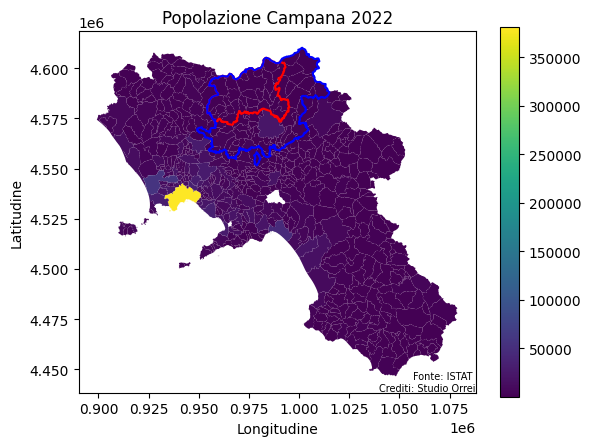

In [78]:
# Crea una figura e un asse
fig, ax = plt.subplots()

# Plotta le geometrie con colori basati sui valori della colonna 'Value'
comuni_campania_shapes_2022.plot(column='Value', ax=ax, legend=True, cmap='viridis')

tammaro_titerno_boundary_gs.plot(ax=ax, color='red')
benevento_boundary_gs.plot(ax=ax, color='blue')

# Aggiungi un titolo e etichette agli assi, se necessario
ax.set_title('Popolazione Campana 2022')
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')

font_properties = {'verticalalignment': 'bottom', 'horizontalalignment': 'right', 'fontsize': 7, 'color': 'black'}
ax.text(1.0, 0.0, 'Fonte: ISTAT \nCrediti: Studio Orrei', transform=ax.transAxes, **font_properties)

# Mostra il grafico
plt.show()

In [79]:
(comuni_campania_shapes_2022['Value'].describe())

count       548.000000
mean       4237.474453
std       17240.911927
min          55.000000
25%         527.500000
50%        1134.000000
75%        3541.250000
max      380979.000000
Name: Value, dtype: float64

In [80]:
bins = [0, 500, 1000, 1500, 3000, 4500, 6000, 7500, 10000, 15000, float('inf')]
comuni_campania_shapes_2022['RangeValue'] = pd.cut(comuni_campania_shapes_2022['Value'], bins=bins, labels= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
, include_lowest=True)


In [81]:
# Crea una mappa di colori viridis originale
viridis = plt.cm.get_cmap('viridis', 256)  # 256 è il numero di colori nella mappa di colori originale

# Crea una sequenza di 10 valori equidistanti tra 0 e 1
indices = np.linspace(0, 1, 10)

# Ottieni 10 colori dalla mappa di colori viridis originale
colors = viridis(indices)

# Crea una nuova mappa di colori con solo questi 10 colori
new_viridis = ListedColormap(colors)

C:\Users\vinor\AppData\Local\Temp\ipykernel_22668\2531046591.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 256)  # 256 è il numero di colori nella mappa di colori originale


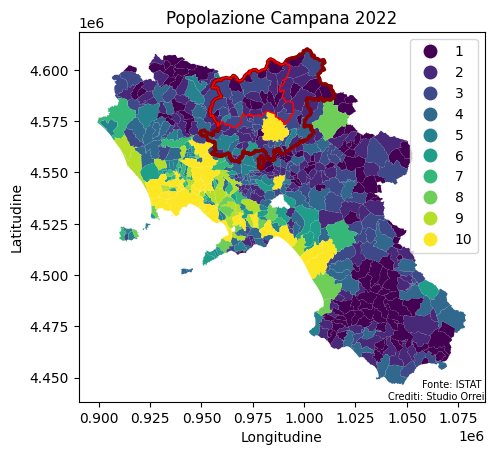

In [82]:
fig, ax = plt.subplots()

comuni_campania_shapes_2022.plot(column='RangeValue', ax=ax, cmap=new_viridis, vmin=0, vmax=10, legend=True)
benevento_boundary_gs.plot(ax=ax, color='darkred', linewidth=2.5)
tammaro_titerno_boundary_gs.plot(ax=ax, color='red', linewidth=1)

# Aggiungi un titolo e etichette agli assi, se necessario
ax.set_title('Popolazione Campana 2022')
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')

# Fonti e crediti
font_properties = {'verticalalignment': 'bottom', 'horizontalalignment': 'right', 'fontsize': 7, 'color': 'black'}
ax.text(1.0, 0.0, 'Fonte: ISTAT \nCrediti: Studio Orrei', transform=ax.transAxes, **font_properties)

# Mostra il grafico
plt.show()

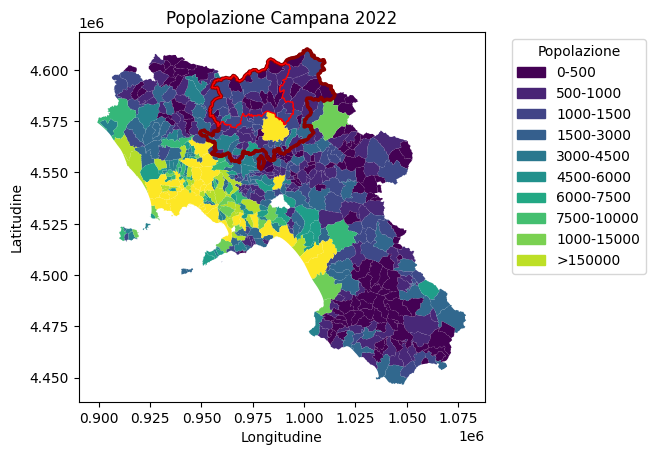

In [84]:
# Crea una figura e un asse
fig, ax = plt.subplots()

# Plotta i tuoi dati
comuni_campania_shapes_2022.plot(column='RangeValue', ax=ax, cmap=new_viridis, vmin=0, vmax=10)

# Creo le etichette
labels = ['0-500', '500-1000', '1000-1500', '1500-3000', '3000-4500', '4500-6000', '6000-7500', '7500-10000', '1000-15000', '>150000']
# Crea una lista di patch per la legenda
patches = [
    mpatches.Patch(color=viridis(i/10), label=f'{label}')
    for i, label in enumerate(labels)
]

# Tracciamo i contorni del Tammaro Titerno
benevento_boundary_gs.plot(ax=ax, color='darkred', linewidth=2.5)
tammaro_titerno_boundary_gs.plot(ax=ax, color='red', linewidth=1)

# Aggiungi la legenda personalizzata
ax.legend(handles=patches, title="Popolazione", bbox_to_anchor=(1.05, 1), loc='upper left')

# Aggiungi un titolo e etichette agli assi, se necessario
ax.set_title('Popolazione Campana 2022')
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')

# Mostra il grafico
plt.show()


In [108]:
comuni_shapes["Value"].describe()

count      30.000000
mean      861.366667
std       599.688165
min       169.000000
25%       450.250000
50%       741.000000
75%      1177.250000
max      3118.000000
Name: Value, dtype: float64

In [113]:
# Nuovi bins
bins = [0, 350, 700, 1050, 1400, 1750, 2100, 2450, 2800, 3250, float('inf')]
comuni_shapes['RangeValue'] = pd.cut(comuni_shapes['Value'], bins=bins, labels= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
, include_lowest=True)

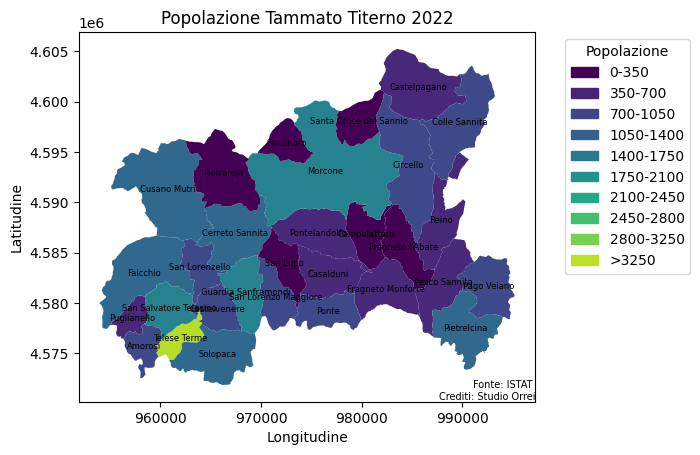

In [123]:
fig, ax = plt.subplots()

# Plotta le geometrie
comuni_shapes.plot(column='RangeValue', ax=ax, cmap=new_viridis, vmin=0, vmax=10)



# Itera attraverso ciascuna riga del GeoDataFrame
for x, y, label in zip(comuni_shapes.geometry.centroid.x, comuni_shapes.geometry.centroid.y, comuni_shapes['COMUNE']):
    ax.text(x, y, label, fontsize = 6, ha='center', va='center')



# Creo le etichette
labels = ['0-350', '350-700', '700-1050', '1050-1400', '1400-1750', '1750-2100', '2100-2450', '2450-2800', '2800-3250', '>3250']
# Crea una lista di patch per la legenda
patches = [
    mpatches.Patch(color=viridis(i/10), label=f'{label}')
    for i, label in enumerate(labels)
]

# Aggiungi la legenda personalizzata
ax.legend(handles=patches, title="Popolazione", bbox_to_anchor=(1.05, 1), loc='upper left')

# Titolo e labels
ax.set_title('Popolazione Tammato Titerno 2022')
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')

# Fonti e crediti
font_properties = {'verticalalignment': 'bottom', 'horizontalalignment': 'right', 'fontsize': 7, 'color': 'black'}
ax.text(1.0, 0.0, 'Fonte: ISTAT \nCrediti: Studio Orrei', transform=ax.transAxes, **font_properties)

# Mostra
plt.show()


In [135]:
y_values = comuni_shapes.geometry.centroid.y.copy()
indices = comuni_shapes[comuni_shapes['COMUNE'].isin(['San Salvatore Telesino', 'Pontelandolfo', 'Guardia Sanframondi', 'Pesco Sannita'])].index
y_values.loc[indices] += 1000
y_array = y_values.to_numpy()


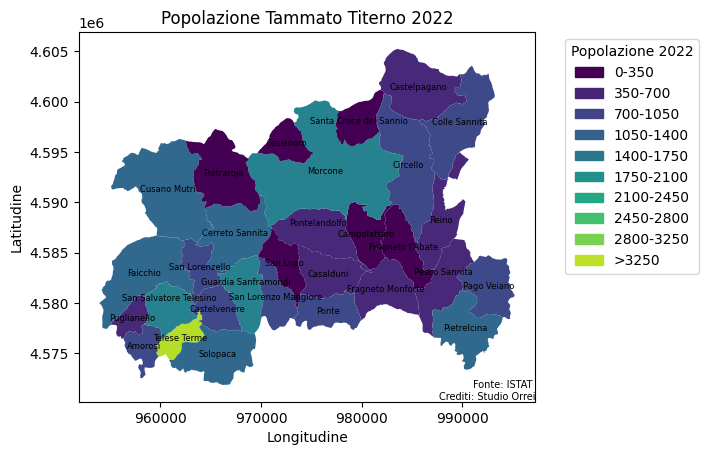

In [137]:
fig, ax = plt.subplots()

# Plotta le geometrie
comuni_shapes.plot(column='RangeValue', ax=ax, cmap=new_viridis, vmin=0, vmax=10)

# Itera attraverso ciascuna riga del GeoDataFrame
for x, y, label in zip(comuni_shapes.geometry.centroid.x, y_array, comuni_shapes['COMUNE']):
    ax.text(x, y, label, fontsize = 6, ha='center', va='center')

# Creo le etichette
labels = ['0-350', '350-700', '700-1050', '1050-1400', '1400-1750', '1750-2100', '2100-2450', '2450-2800', '2800-3250', '>3250']
# Crea una lista di patch per la legenda
patches = [
    mpatches.Patch(color=viridis(i/10), label=f'{label}')
    for i, label in enumerate(labels)
]

# Aggiungi la legenda personalizzata
ax.legend(handles=patches, title="Popolazione 2022", bbox_to_anchor=(1.05, 1), loc='upper left')

# Titolo e labels
ax.set_title('Popolazione Tammato Titerno 2022')
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')

# Fonti e crediti
font_properties = {'verticalalignment': 'bottom', 'horizontalalignment': 'right', 'fontsize': 7, 'color': 'black'}
ax.text(1.0, 0.0, 'Fonte: ISTAT \nCrediti: Studio Orrei', transform=ax.transAxes, **font_properties)

# Mostra
plt.show()
